## 100 micro-sec recording simulation analysis

In [23]:
from util import *
import os, shutil
import pandas as pd

from opmap.videoData import VideoData
from opmap.vmemMap import VmemMap
from opmap.phaseMap import PhaseMap
from opmap.phaseVarianceMap import PhaseVarianceMap
from elecpy.elecpySession import ElecpySession

%matplotlib inline

In [24]:
src_dir = '/mnt/recordings/SimulationResult/'
save_dir = '/mnt/recordings/AnalysisResult/Tomii/2018-07-25/'
print(save_dir)
if not os.path.exists(save_dir) : os.mkdir(save_dir)

/mnt/recordings/AnalysisResult/Tomii/2018-07-25/


## Check region detail

In [25]:
df = pd.read_csv('data.roi.csv')
df

,sim_id,x_min,x_max,y_min,y_max,f_min,f_max,description
0,20180525-1,135,165,85,115,290,330,pivoting
1,20180616-1,80,120,80,120,360,400,over the trajectory of vortex shedding
2,20180616-1,40,80,120,160,80,160,out of trajectory
3,20180725-2,80,120,80,120,3600,4000,over the trajectory of vortex shedding (100mic...
4,20180725-2,40,80,120,160,800,1600,out of trajectory (100microsec)
5,20180625-1,70,100,85,115,50,80,meandering
6,20180625-1,110,150,80,120,120,160,meandering
7,20180625-1,90,130,80,120,60,100,meandering
8,20180625-1,160,200,80,120,220,260,spiral stop
9,20180725-1,70,100,85,115,500,800,meandering (100microsec)


/mnt/recordings/AnalysisResult/Tomii/2018-07-25/20180725-2/x80-120_y80-120_f3600-4000
/mnt/recordings/SimulationResult/20180725-2


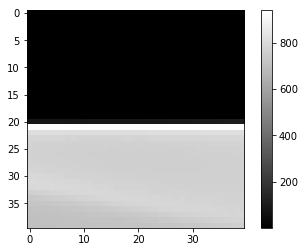

In [26]:
for i, row in df.iterrows():
    
    if i not in [3]: continue
    
    dst_dir = os.path.join(save_dir, '{0}'.format(row['sim_id']))
    dst_dir = os.path.join(dst_dir, 'x{0}-{1}_y{2}-{3}_f{4}-{5}'.format(
        row.x_min,row.x_max,
        row.y_min,row.y_max,
        row.f_min,row.f_max,
    ))
    print(dst_dir)
    #if os.path.exists(dst_dir) : shutil.rmtree(dst_dir)
    if not os.path.exists(dst_dir) : os.makedirs(dst_dir)
        
    path = os.path.join( src_dir, row.sim_id)
    print(path)
    
    sess = ElecpySession(path)
    sess.setRange(
        x_min = row.x_min,
        x_max = row.x_max,
        y_min = row.y_min,
        y_max = row.y_max,
        f_min = row.f_min,
        f_max = row.f_max
    )

    xina = abs(np.sum(sess.data["cell/xina"], axis=0))
    plt.clf()
    plt.imshow(xina, cmap='gray')
    plt.colorbar()
    plt.savefig(os.path.join(dst_dir, 'xina.png'))   
    